In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tfM
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

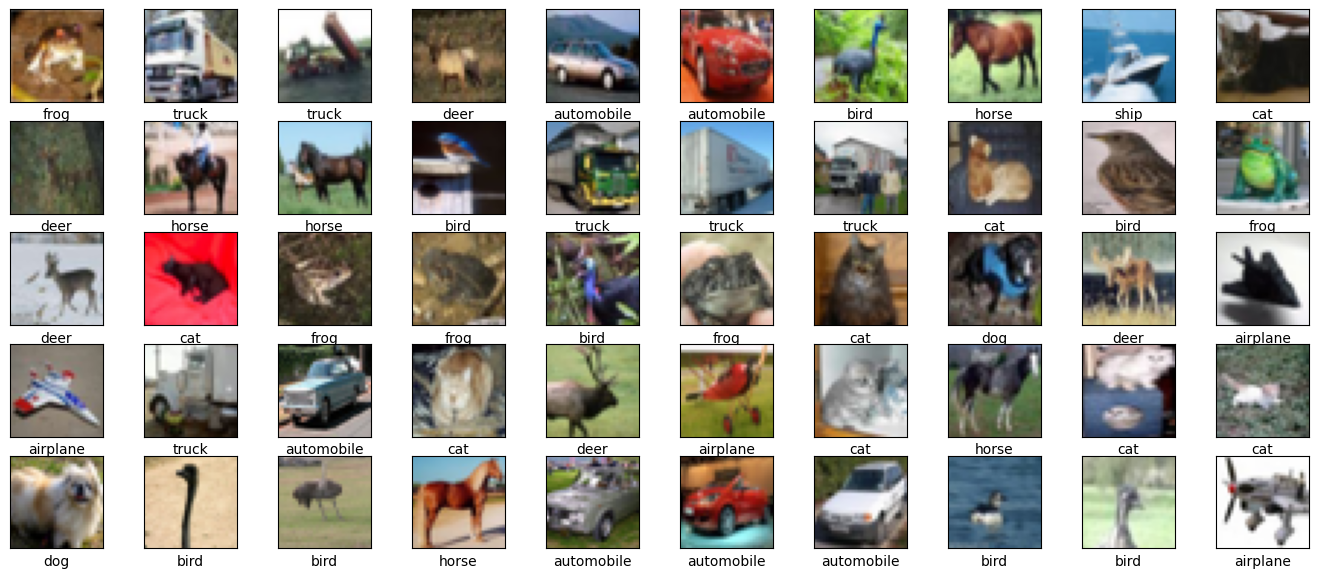

In [5]:
plt.figure(figsize=(17,7))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [9]:
model = keras.Sequential([
    # Input layer
    keras.Input(shape=(32, 32, 3)),
    
    # Layer 1: Conv + MaxPooling
    layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu', strides=1, padding='same'),  # input->(32,32) output->(32,32)
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),  # output->(16,16)
    
    # Layer 2: Conv + MaxPooling
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),  # output->(16,16)
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),  # output->(8,8)
    
    # Layer 3: Conv
    layers.Conv2D(filters=384, kernel_size=(3, 3), activation='relu', padding='same'),  # output->(8,8)
    
    # Layer 4: Conv
    layers.Conv2D(filters=384, kernel_size=(3, 3), activation='relu', padding='same'),  # output->(8,8)
    
    # Layer 5: Conv + MaxPooling
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),  # output->(8,8)
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),  # output->(4,4)
    
    # Flattening the output for Fully Connected layers
    layers.Flatten(),
    
    # Fully Connected layers
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(1000, activation='relu'),  # Optional, can be reduced if needed
    
    # Output layer (for 10 classes)
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 256)         │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,991,362 (156.37 MB)

 Trainable params: 40,991,362 (156.37 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
h = model.fit(x=X_train, y=y_train, epochs=5, validation_split=0.2, batch_size=32)

Epoch 1/5


ResourceExhaustedError: Graph execution error:

Detected at node adam/Square_6 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\arsha\AppData\Local\Temp\ipykernel_20060\2874023861.py", line 1, in <module>

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 318, in fit

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 73, in train_step

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\optimizers\base_optimizer.py", line 282, in apply_gradients

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\optimizers\base_optimizer.py", line 351, in apply

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\optimizers\base_optimizer.py", line 405, in _backend_apply_gradients

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\backend\tensorflow\optimizer.py", line 119, in _backend_update_step

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\backend\tensorflow\optimizer.py", line 135, in _distributed_tf_update_step

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\backend\tensorflow\optimizer.py", line 132, in apply_grad_to_update_var

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\optimizers\adam.py", line 138, in update_step

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\ops\numpy.py", line 5662, in square

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\backend\tensorflow\sparse.py", line 387, in sparse_wrapper

  File "C:\Users\arsha\.conda\envs\tensorflow\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 2283, in square

OOM when allocating tensor with shape[3,3,384,384] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu
	 [[{{node adam/Square_6}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_3542]

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[0]